<a href="https://colab.research.google.com/github/roxacarv/edulearn/blob/main/Edulearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Plataforma Edulearn

In [1]:
#Importando as bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

# Evolução de alunos matriculados

In [2]:
total_matriculados = pd.read_csv('total_matriculados.csv', encoding='latin-1')
total_matriculados

,ANO,ALUNO COM DEFICIENCIA,PORCENTAGEM,ALUNO TOTAL,POPULACAO TOTAL
0,2010,25205,"0,30%",8337219,194890682
1,2011,29033,"0,32%",8961724,196603732
2,2012,34656,"0,36%",9565483,198314934
3,2013,37796,"0,38%",9929289,200004188
4,2014,45088,"0,56%",8081369,201717541
5,2015,51685,"0,46%",11187296,203475683
6,2016,49813,"0,44%",11449222,205156587
7,2017,52542,"0,45%",11589194,206804741
8,2018,59496,"0,49%",12043993,208494900
9,2019,66750,"0,41%",16425302,210147122


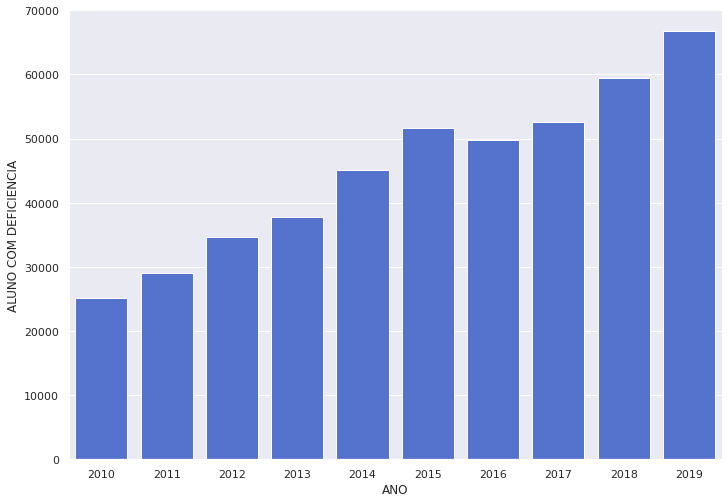

In [3]:
#Gráfico de evolução de alunos com deficiência no ensino superior
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data=total_matriculados, x='ANO', y='ALUNO COM DEFICIENCIA',color='royalblue').figure.savefig('figura_1')

Text(0.5, 1.0, 'Evolução de alunos no ensino superior')

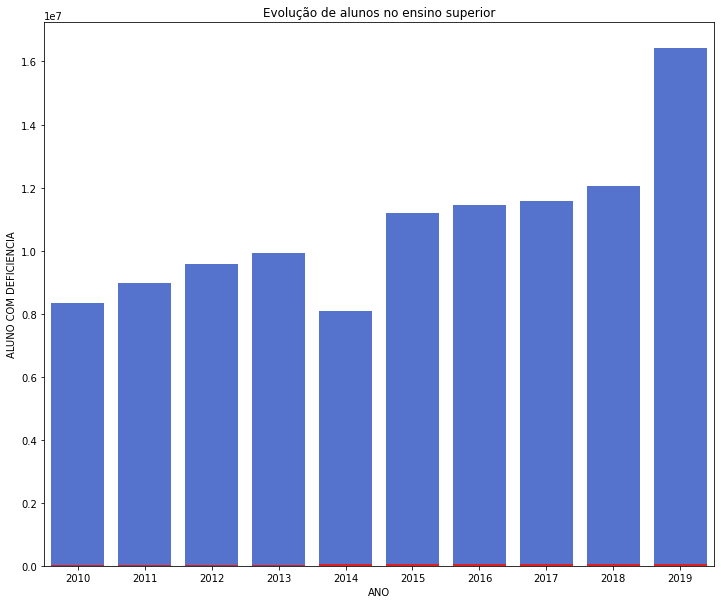

In [ ]:
#Gráfico de evolução de alunos com deficiência comparado ao total de alunos
plt.figure(figsize = (12, 10))
sns.barplot(data=total_matriculados, x='ANO', y='ALUNO TOTAL',color='royalblue').figure.savefig('figura_2.png')
sns.barplot(data=total_matriculados, x='ANO', y='ALUNO COM DEFICIENCIA',color='red').figure.savefig('figura_2.png')
plt.title('Evolução de alunos no ensino superior')

In [ ]:
#Salvar figura como imagem
fig = sns_plot.get_figure()
fig.savefig("output.png")

# Censo 2019 - IES

In [ ]:
#Carregando os dados das IES
url_censo_ies_2019 = 'https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/SUP_IES_2019.CSV'
df_ies = pd.read_csv(url_censo_ies_2019, sep='|', encoding='latin-1', usecols=['CO_IES','NO_IES','SG_IES','TP_CATEGORIA_ADMINISTRATIVA','TP_ORGANIZACAO_ACADEMICA','CO_REGIAO','CO_UF','CO_MUNICIPIO'])
df_ies.head()

,CO_IES,NO_IES,SG_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,CO_REGIAO,CO_UF,CO_MUNICIPIO
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,1,1,5,51,5103403
1,2,UNIVERSIDADE DE BRASÍLIA,UNB,1,1,5,53,5300108
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,1,1,2,28,2806701
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,1,1,1,13,1302603
4,6,UNIVERSIDADE FEDERAL DE OURO PRETO,UFOP,1,1,3,31,3146107


In [ ]:
#Renomeando as colunas
df_ies = df_ies.rename(columns={
    'CO_IES':'CODIGO_IES',
    'NO_IES':'NOME_IES',
    'SG_IES':'SIGLA_IES',
    'TP_CATEGORIA_ADMINISTRATIVA':'TIPO_CATEGORIA_ADM',
    'TP_ORGANIZACAO_ACADEMICA':'TIPO_ORG_ACADEMICA',
    'CO_REGIAO':'REGIAO',
    'CO_UF':'UF',
    'CO_MUNICIPIO':'CODIGO_MUNICIPIO'
})
df_ies.head()

,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF,CODIGO_MUNICIPIO
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,1,1,5,51,5103403
1,2,UNIVERSIDADE DE BRASÍLIA,UNB,1,1,5,53,5300108
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,1,1,2,28,2806701
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,1,1,1,13,1302603
4,6,UNIVERSIDADE FEDERAL DE OURO PRETO,UFOP,1,1,3,31,3146107


In [ ]:
#Substituindo o código pelo nome das unidades federativas
uf = {
    '11':'Rondônia',
    '12':'Acre',
    '13':'Amazonas',
    '14':'Roraima',
    '15':'Pará',
    '16':'Amapá',
    '17':'Tocantins',
    '21':'Maranhão',
    '22':'Piauí',
    '23':'Ceará',
    '24':'Rio Grande do Norte',
    '25':'Paraíba',
    '26':'Pernambuco',
    '27':'Alagoas',
    '28':'Sergipe',
    '29':'Bahia',
    '31':'Minas Gerais',
    '32':'Espírito Santo',
    '33':'Rio de Janeiro',
    '35':'São Paulo',
    '41':'Paraná',
    '42':'Santa Catarina',
    '43':'Rio Grande do Sul',
    '50':'Mato Grosso do Sul',
    '51':'Mato Grosso',
    '52':'Goiás',
    '53':'Distrito Federal',
}
df_ies = df_ies.astype({'UF':str})
df_ies.UF = df_ies.UF.map(uf)
df_ies.head()

,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF,CODIGO_MUNICIPIO
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,1,1,5,Mato Grosso,5103403
1,2,UNIVERSIDADE DE BRASÍLIA,UNB,1,1,5,Distrito Federal,5300108
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,1,1,2,Sergipe,2806701
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,1,1,1,Amazonas,1302603
4,6,UNIVERSIDADE FEDERAL DE OURO PRETO,UFOP,1,1,3,Minas Gerais,3146107


In [ ]:
#Substituindo o código pelo nome das regiões
regiao = {
    '1':'Norte',
    '2':'Nordeste',
    '3':'Sudeste',
    '4':'Sul',
    '5':'Centro-Oeste',
}
df_ies = df_ies.astype({'REGIAO':str})
df_ies.REGIAO = df_ies.REGIAO.map(regiao)
df_ies.head()

,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF,CODIGO_MUNICIPIO
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,1,1,Centro-Oeste,Mato Grosso,5103403
1,2,UNIVERSIDADE DE BRASÍLIA,UNB,1,1,Centro-Oeste,Distrito Federal,5300108
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,1,1,Nordeste,Sergipe,2806701
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,1,1,Norte,Amazonas,1302603
4,6,UNIVERSIDADE FEDERAL DE OURO PRETO,UFOP,1,1,Sudeste,Minas Gerais,3146107


In [ ]:
#Substituindo o código pelo tipo de categoria administrativa
categoria_adm = {
    '1':'Pública Federal',
    '2':'Pública Estadual',
    '3':'Pública Municipal',
    '4':'Privada com fins lucrativos',
    '5':'Privada sem fins lucrativos',
    '6':'Privada - Particular em sentido estrito',
    '7':'Especial',
    '8':'Privada comunitária',
    '9':'Privada confessional',
}
df_ies = df_ies.astype({'TIPO_CATEGORIA_ADM':str})
df_ies.TIPO_CATEGORIA_ADM = df_ies.TIPO_CATEGORIA_ADM.map(categoria_adm)
df_ies.head()

,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF,CODIGO_MUNICIPIO
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403
1,2,UNIVERSIDADE DE BRASÍLIA,UNB,Pública Federal,Universidade,Centro-Oeste,Distrito Federal,5300108
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,Pública Federal,Universidade,Nordeste,Sergipe,2806701
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,Pública Federal,Universidade,Norte,Amazonas,1302603
4,6,UNIVERSIDADE FEDERAL DE OURO PRETO,UFOP,Pública Federal,Universidade,Sudeste,Minas Gerais,3146107


In [ ]:
#Substituindo o código pelo tipo de organização acadêmica
org_academica = {
    '1':'Universidade',
    '2':'Centro Universitário',
    '3':'Faculdade',
    '4':'Instituto Federal de Educação, Ciência e Tecnologia',                               
    '5':'Centro Federal de Educação Tecnológica',
}
df_ies = df_ies.astype({'TIPO_ORG_ACADEMICA':str})
df_ies.TIPO_ORG_ACADEMICA = df_ies.TIPO_ORG_ACADEMICA.map(org_academica)
df_ies.head()

,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF,CODIGO_MUNICIPIO
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,1,Universidade,Centro-Oeste,Mato Grosso,5103403
1,2,UNIVERSIDADE DE BRASÍLIA,UNB,1,Universidade,Centro-Oeste,Distrito Federal,5300108
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,1,Universidade,Nordeste,Sergipe,2806701
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,1,Universidade,Norte,Amazonas,1302603
4,6,UNIVERSIDADE FEDERAL DE OURO PRETO,UFOP,1,Universidade,Sudeste,Minas Gerais,3146107


## Censo 2019 - Cursos

In [ ]:
df_curso = pd.read_csv('SUP_CURSO_2019.CSV', sep='|', encoding='latin-1', usecols=['CO_IES','CO_CURSO','NO_CURSO','TP_SITUACAO','TP_GRAU_ACADEMICO','TP_MODALIDADE_ENSINO','IN_AJUDA_DEFICIENTE','IN_MATERIAL_DIGITAL','IN_MATERIAL_AMPLIADO','IN_MATERIAL_TATIL','IN_MATERIAL_IMPRESSO','IN_MATERIAL_AUDIO','IN_MATERIAL_BRAILLE','IN_MATERIAL_LIBRAS','IN_DISCIPLINA_LIBRAS','IN_TRADUTOR_LIBRAS','IN_GUIA_INTERPRETE','IN_RECURSOS_COMUNICACAO','IN_RECURSOS_INFORMATICA'])
df_curso.head()

,CO_IES,CO_CURSO,NO_CURSO,TP_SITUACAO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,IN_AJUDA_DEFICIENTE,IN_MATERIAL_DIGITAL,IN_MATERIAL_AMPLIADO,IN_MATERIAL_TATIL,IN_MATERIAL_IMPRESSO,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA
0,1,1,DIREITO,1,1.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,2,CIÊNCIAS ECONÔMICAS,1,1.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,ENGENHARIA CIVIL,1,1.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,6,PEDAGOGIA,1,2.0,1,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
4,1,7,SERVIÇO SOCIAL,1,1.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
#Substituindo o código pelo tipo da situação de funcionamento do curso
tp_situacao = {
    '1':'Em atividade',
    '2':'Extinto',
    '3':'Em extinção',
}
df_curso = df_curso.astype({'TP_SITUACAO':str})
df_curso.TP_SITUACAO = df_curso.TP_SITUACAO.map(tp_situacao)
df_curso.head()

,CO_IES,CO_CURSO,NO_CURSO,TP_SITUACAO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,IN_AJUDA_DEFICIENTE,IN_MATERIAL_DIGITAL,IN_MATERIAL_AMPLIADO,IN_MATERIAL_TATIL,IN_MATERIAL_IMPRESSO,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA
0,1,1,DIREITO,Em atividade,1.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,2,CIÊNCIAS ECONÔMICAS,Em atividade,1.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,ENGENHARIA CIVIL,Em atividade,1.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,6,PEDAGOGIA,Em atividade,2.0,1,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
4,1,7,SERVIÇO SOCIAL,Em atividade,1.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
#Substituindo o código pelo tipo do grau acadêmico conferido ao ao aluno pela conclusão dos requisitos exigidos pelo curso
grau_academico = {
    '1.0':'Bacharelado',
    '2.0':'Licenciatura',
    '3.0':'Tecnológico',
    '4.0':'Bacharelado e Licenciatura',
}
df_curso = df_curso.astype({'TP_GRAU_ACADEMICO':str})
df_curso.TP_GRAU_ACADEMICO = df_curso.TP_GRAU_ACADEMICO.map(grau_academico)
df_curso.head()

,CO_IES,CO_CURSO,NO_CURSO,TP_SITUACAO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,IN_AJUDA_DEFICIENTE,IN_MATERIAL_DIGITAL,IN_MATERIAL_AMPLIADO,IN_MATERIAL_TATIL,IN_MATERIAL_IMPRESSO,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA
0,1,1,DIREITO,Em atividade,Bacharelado,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,2,CIÊNCIAS ECONÔMICAS,Em atividade,Bacharelado,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,ENGENHARIA CIVIL,Em atividade,Bacharelado,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,6,PEDAGOGIA,Em atividade,Licenciatura,1,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
4,1,7,SERVIÇO SOCIAL,Em atividade,Bacharelado,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
#Substituindo o código pelo tipo da modalidade de ensino do curso
modalidade = {
    '1':'Presencial',
    '2':'Curso a distância',
}
df_curso = df_curso.astype({'TP_MODALIDADE_ENSINO':str})
df_curso.TP_MODALIDADE_ENSINO = df_curso.TP_MODALIDADE_ENSINO.map(modalidade)
df_curso.head()

,CO_IES,CO_CURSO,NO_CURSO,TP_SITUACAO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,IN_AJUDA_DEFICIENTE,IN_MATERIAL_DIGITAL,IN_MATERIAL_AMPLIADO,IN_MATERIAL_TATIL,IN_MATERIAL_IMPRESSO,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA
0,1,1,DIREITO,Em atividade,Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,2,CIÊNCIAS ECONÔMICAS,Em atividade,Bacharelado,Presencial,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,ENGENHARIA CIVIL,Em atividade,Bacharelado,Presencial,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,6,PEDAGOGIA,Em atividade,Licenciatura,Presencial,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
4,1,7,SERVIÇO SOCIAL,Em atividade,Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
#Renomeando as colunas
df_curso = df_curso.rename(columns={
    'CO_IES':'CODIGO_IES',
    'CO_CURSO':'CODIGO_CURSO',
    'NO_CURSO':'NOME_CURSO',
    'TP_SITUACAO':'SITUACAO',
    'TP_GRAU_ACADEMICO':'TIPO_GRAU_ACADEMICO',
    'TP_MODALIDADE_ENSINO':'MODALIDADE_ENSINO',
    'IN_AJUDA_DEFICIENTE':'ACESSIBILIDADE_DEFICIENTE',
    'IN_MATERIAL_DIGITAL':'MATERIAL_DIGITAL',
    'IN_MATERIAL_AMPLIADO':'MATERIAL_AMPLIADO',
    'IN_MATERIAL_TATIL':'MATERIAL_TATIL',
    'IN_MATERIAL_IMPRESSO':'MATERIAL_IMPRESSO',
    'IN_MATERIAL_AUDIO':'MATERIAL_AUDIO',
    'IN_MATERIAL_BRAILLE':'MATERIAL_BRAILLE',
    'IN_MATERIAL_LIBRAS':'MATERIAL_LIBRAS',
    'IN_DISCIPLINA_LIBRAS':'DISCIPLINA_LIBRAS',
    'IN_TRADUTOR_LIBRAS':'TRADUTOR_LIBRAS',
    'IN_GUIA_INTERPRETE':'GUIA_INTERPRETE',
    'IN_RECURSOS_COMUNICACAO':'RECURSOS_COMUNICACAO',
    'IN_RECURSOS_INFORMATICA':'RECURSOS_INFORMATICA',
})
df_curso.head()

,CODIGO_IES,CODIGO_CURSO,NOME_CURSO,SITUACAO,TIPO_GRAU_ACADEMICO,MODALIDADE_ENSINO,ACESSIBILIDADE_DEFICIENTE,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA
0,1,1,DIREITO,Em atividade,Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,2,CIÊNCIAS ECONÔMICAS,Em atividade,Bacharelado,Presencial,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,ENGENHARIA CIVIL,Em atividade,Bacharelado,Presencial,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,6,PEDAGOGIA,Em atividade,Licenciatura,Presencial,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
4,1,7,SERVIÇO SOCIAL,Em atividade,Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#Unindo as informações das IES e dos cursos

In [ ]:
#df_curso = df_ies.join(df_curso.set_index('CODIGO_IES'), on='CODIGO_IES')
#df_curso.head()

,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF,CODIGO_MUNICIPIO,CODIGO_CURSO,NOME_CURSO,SITUACAO,TIPO_GRAU_ACADEMICO,MODALIDADE_ENSINO,ACESSIBILIDADE_DEFICIENTE,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,1,Universidade,Centro-Oeste,Mato Grosso,5103403,1,DIREITO,Em atividade,Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,1,Universidade,Centro-Oeste,Mato Grosso,5103403,2,CIÊNCIAS ECONÔMICAS,Em atividade,Bacharelado,Presencial,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,1,Universidade,Centro-Oeste,Mato Grosso,5103403,3,ENGENHARIA CIVIL,Em atividade,Bacharelado,Presencial,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,1,Universidade,Centro-Oeste,Mato Grosso,5103403,6,PEDAGOGIA,Em atividade,Licenciatura,Presencial,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,1,Universidade,Centro-Oeste,Mato Grosso,5103403,7,SERVIÇO SOCIAL,Em atividade,Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Censo 2019 - Alunos deficientes

In [ ]:
#Carregando os dados do Censo do Ensino Superior(2019), referentes aos alunos com deficiência
df_aluno = pd.read_csv('alunodeficiente_2019.csv', encoding='latin-1', usecols=['CO_CURSO','IN_DEFICIENCIA','IN_DEFICIENCIA_AUDITIVA','IN_DEFICIENCIA_FISICA','IN_DEFICIENCIA_INTELECTUAL','IN_DEFICIENCIA_MULTIPLA','IN_DEFICIENCIA_SURDEZ','IN_DEFICIENCIA_SURDOCEGUEIRA','IN_DEFICIENCIA_BAIXA_VISAO','IN_DEFICIENCIA_CEGUEIRA','IN_DEFICIENCIA_SUPERDOTACAO','IN_TGD_AUTISMO','IN_TGD_SINDROME_ASPERGER','IN_TGD_SINDROME_RETT','IN_TGD_TRANSTOR_DESINTEGRATIVO'])
df_aluno.head()

,CO_CURSO,IN_DEFICIENCIA,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_INTELECTUAL,IN_DEFICIENCIA_MULTIPLA,IN_DEFICIENCIA_SURDEZ,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO
0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Quantidade de alunos deficientes no curso 1
len(df_aluno.loc[df_aluno['CO_CURSO'] == 1].index)

10

In [ ]:
#Quantidade de alunos com deficiência auditiva no curso 1
len(df_aluno.loc[(df_aluno['CO_CURSO'] == 1) & (df_aluno['IN_DEFICIENCIA_AUDITIVA'] == 1)].index)

1

In [ ]:
#Exportando o dataframe para um csv para melhorar o tempo de execução de nosso código
df_curso.to_csv('curso_e_ies_2019.csv')

# Analisando a quantidade de alunos com deficiência nos cursos

In [ ]:
df_curso_e_ies = pd.read_csv('curso_e_ies_2019.csv')

In [ ]:
#Somando os dados dos alunos por tipo de deficiência
tipos_deficiencia = df_curso_e_ies[['ALUNOS_COM_DEFICIENCIA_AUDITIVA','ALUNOS_COM_DEFICIENCIA_FISICA','ALUNOS_COM_DEFICIENCIA_INTELECTUAL','ALUNOS_COM_DEFICIENCIA_MULTIPLA','ALUNOS_COM_SURDEZ','ALUNOS_COM_SURDOCEGUEIRA','ALUNOS_COM_BAIXA_VISAO','ALUNOS_COM_CEGUEIRA','ALUNOS_COM_SUPERDOTACAO','ALUNOS_COM_TGD_AUTISMO','ALUNOS_COM_TGD_SINDROME_ASPERGER','ALUNOS_COM_TGD_SINDROME_RETT','ALUNOS_COM_TGD_TRANSTOR_DESINTEGRATIVO']].sum()
tipos_deficiencia

ALUNOS_COM_DEFICIENCIA_AUDITIVA            9144
ALUNOS_COM_DEFICIENCIA_FISICA             23089
ALUNOS_COM_DEFICIENCIA_INTELECTUAL         5605
ALUNOS_COM_DEFICIENCIA_MULTIPLA            1201
ALUNOS_COM_SURDEZ                          3459
ALUNOS_COM_SURDOCEGUEIRA                    229
ALUNOS_COM_BAIXA_VISAO                    18951
ALUNOS_COM_CEGUEIRA                        3461
ALUNOS_COM_SUPERDOTACAO                    2132
ALUNOS_COM_TGD_AUTISMO                     1211
ALUNOS_COM_TGD_SINDROME_ASPERGER            811
ALUNOS_COM_TGD_SINDROME_RETT                279
ALUNOS_COM_TGD_TRANSTOR_DESINTEGRATIVO      463
dtype: int64

In [ ]:
#Transformando series em dataframe
df_tipos_deficiencia = pd.DataFrame(tipos_deficiencia,columns=['ALUNOS'])
df_tipos_deficiencia['TIPOS_DE_DEFICIENCIA'] = df_tipos_deficiencia.index
df_tipos_deficiencia.index = range(len(df_tipos_deficiencia.index))
df_tipos_deficiencia

,ALUNOS,TIPOS_DE_DEFICIENCIA
0,9144,ALUNOS_COM_DEFICIENCIA_AUDITIVA
1,23089,ALUNOS_COM_DEFICIENCIA_FISICA
2,5605,ALUNOS_COM_DEFICIENCIA_INTELECTUAL
3,1201,ALUNOS_COM_DEFICIENCIA_MULTIPLA
4,3459,ALUNOS_COM_SURDEZ
5,229,ALUNOS_COM_SURDOCEGUEIRA
6,18951,ALUNOS_COM_BAIXA_VISAO
7,3461,ALUNOS_COM_CEGUEIRA
8,2132,ALUNOS_COM_SUPERDOTACAO
9,1211,ALUNOS_COM_TGD_AUTISMO


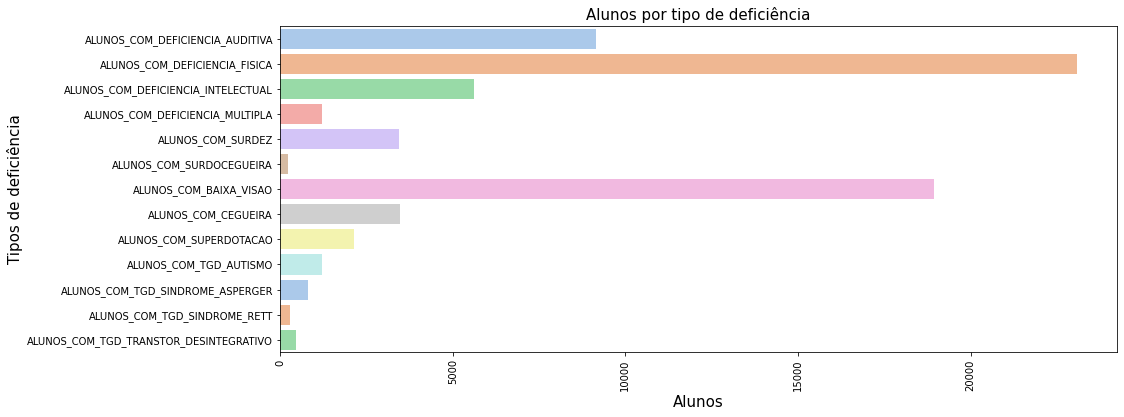

In [ ]:
#Visualizando os tipos de deficiência dos alunos em  2019
plt.figure(figsize=(15,6))
deficiencias = sns.barplot(x='ALUNOS', y='TIPOS_DE_DEFICIENCIA', data=df_tipos_deficiencia, palette='pastel')
plt.xticks(rotation=90)
deficiencias.set_title('Alunos por tipo de deficiência', fontsize = 15)
deficiencias.set_xlabel('Alunos',fontsize = 15)
deficiencias.set_ylabel('Tipos de deficiência',fontsize=15)
deficiencias.figure.savefig("figura_3.png")

In [ ]:
#Calcular a quantidade de recursos de acessibilidade ofertados por cada curso
def contar_recursos(row):
  return row['MATERIAL_DIGITAL'] + row['MATERIAL_AMPLIADO'] + row['MATERIAL_TATIL'] + row['MATERIAL_IMPRESSO'] + row['MATERIAL_AUDIO'] + row['MATERIAL_BRAILLE'] + row['MATERIAL_LIBRAS'] + row['DISCIPLINA_LIBRAS'] + row['TRADUTOR_LIBRAS'] + row['GUIA_INTERPRETE'] + row['RECURSOS_COMUNICACAO'] + row['RECURSOS_INFORMATICA'] + row['DISCIPLINA_LIBRAS']

df_curso_e_ies['RECURSOS'] = df_curso_e_ies.apply(contar_recursos, axis=1)
df_curso_e_ies.head()

,Unnamed: 0,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF,CODIGO_MUNICIPIO,CODIGO_CURSO,NOME_CURSO,SITUACAO,TIPO_GRAU_ACADEMICO,MODALIDADE_ENSINO,ALUNOS_COM_DEFICIENCIA,ALUNOS_COM_DEFICIENCIA_AUDITIVA,ALUNOS_COM_DEFICIENCIA_FISICA,ALUNOS_COM_DEFICIENCIA_INTELECTUAL,ALUNOS_COM_DEFICIENCIA_MULTIPLA,ALUNOS_COM_SURDEZ,ALUNOS_COM_SURDOCEGUEIRA,ALUNOS_COM_BAIXA_VISAO,ALUNOS_COM_CEGUEIRA,ALUNOS_COM_SUPERDOTACAO,ALUNOS_COM_TGD_AUTISMO,ALUNOS_COM_TGD_SINDROME_ASPERGER,ALUNOS_COM_TGD_SINDROME_RETT,ALUNOS_COM_TGD_TRANSTOR_DESINTEGRATIVO,ACESSIBILIDADE_DEFICIENTE,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,RECURSOS
0,0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,1,Universidade,Centro-Oeste,Mato Grosso,5103403,1,DIREITO,Em atividade,Bacharelado,Presencial,10,1,9,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
1,0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,1,Universidade,Centro-Oeste,Mato Grosso,5103403,2,CIÊNCIAS ECONÔMICAS,Em atividade,Bacharelado,Presencial,5,1,3,0,0,0,0,0,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,1,Universidade,Centro-Oeste,Mato Grosso,5103403,3,ENGENHARIA CIVIL,Em atividade,Bacharelado,Presencial,3,1,2,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,1,Universidade,Centro-Oeste,Mato Grosso,5103403,6,PEDAGOGIA,Em atividade,Licenciatura,Presencial,12,2,5,0,0,0,0,2,2,0,0,1,0,0,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,10.0
4,0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,1,Universidade,Centro-Oeste,Mato Grosso,5103403,7,SERVIÇO SOCIAL,Em atividade,Bacharelado,Presencial,8,6,1,0,1,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0


#Tipos de deficiência por IES

In [ ]:
#Substituindo o código pelo tipo de categoria administrativa
categoria_adm = {
    '1':'Pública Federal',
    '2':'Pública Estadual',
    '3':'Pública Municipal',
    '4':'Privada com fins lucrativos',
    '5':'Privada sem fins lucrativos',
    '6':'Privada - Particular em sentido estrito',
    '7':'Especial',
    '8':'Privada comunitária',
    '9':'Privada confessional',
}
df_curso_e_ies = df_curso_e_ies.astype({'TIPO_CATEGORIA_ADM':str})
df_curso_e_ies.TIPO_CATEGORIA_ADM = df_curso_e_ies.TIPO_CATEGORIA_ADM.map(categoria_adm)
df_curso_e_ies.head()

,Unnamed: 0,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF,CODIGO_MUNICIPIO,CODIGO_CURSO,NOME_CURSO,SITUACAO,TIPO_GRAU_ACADEMICO,MODALIDADE_ENSINO,ALUNOS_COM_DEFICIENCIA,ALUNOS_COM_DEFICIENCIA_AUDITIVA,ALUNOS_COM_DEFICIENCIA_FISICA,ALUNOS_COM_DEFICIENCIA_INTELECTUAL,ALUNOS_COM_DEFICIENCIA_MULTIPLA,ALUNOS_COM_SURDEZ,ALUNOS_COM_SURDOCEGUEIRA,ALUNOS_COM_BAIXA_VISAO,ALUNOS_COM_CEGUEIRA,ALUNOS_COM_SUPERDOTACAO,ALUNOS_COM_TGD_AUTISMO,ALUNOS_COM_TGD_SINDROME_ASPERGER,ALUNOS_COM_TGD_SINDROME_RETT,ALUNOS_COM_TGD_TRANSTOR_DESINTEGRATIVO,ACESSIBILIDADE_DEFICIENTE,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,RECURSOS
0,0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,1,DIREITO,Em atividade,Bacharelado,Presencial,10,1,9,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
1,0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,2,CIÊNCIAS ECONÔMICAS,Em atividade,Bacharelado,Presencial,5,1,3,0,0,0,0,0,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,3,ENGENHARIA CIVIL,Em atividade,Bacharelado,Presencial,3,1,2,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,6,PEDAGOGIA,Em atividade,Licenciatura,Presencial,12,2,5,0,0,0,0,2,2,0,0,1,0,0,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,10.0
4,0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,7,SERVIÇO SOCIAL,Em atividade,Bacharelado,Presencial,8,6,1,0,1,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0


In [ ]:
#Filtrando apenas as IES públicas
df_curso_e_ies_publico = df_curso_e_ies.loc[(df_curso_e_ies['TIPO_CATEGORIA_ADM'] == 'Pública Federal') | (df_curso_e_ies['TIPO_CATEGORIA_ADM'] == 'Pública Estadual') | (df_curso_e_ies['TIPO_CATEGORIA_ADM'] == 'Pública Municipal')]
df_curso_e_ies_publico.head()
            

,Unnamed: 0,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF,CODIGO_MUNICIPIO,CODIGO_CURSO,NOME_CURSO,SITUACAO,TIPO_GRAU_ACADEMICO,MODALIDADE_ENSINO,ALUNOS_COM_DEFICIENCIA,ALUNOS_COM_DEFICIENCIA_AUDITIVA,ALUNOS_COM_DEFICIENCIA_FISICA,ALUNOS_COM_DEFICIENCIA_INTELECTUAL,ALUNOS_COM_DEFICIENCIA_MULTIPLA,ALUNOS_COM_SURDEZ,ALUNOS_COM_SURDOCEGUEIRA,ALUNOS_COM_BAIXA_VISAO,ALUNOS_COM_CEGUEIRA,ALUNOS_COM_SUPERDOTACAO,ALUNOS_COM_TGD_AUTISMO,ALUNOS_COM_TGD_SINDROME_ASPERGER,ALUNOS_COM_TGD_SINDROME_RETT,ALUNOS_COM_TGD_TRANSTOR_DESINTEGRATIVO,ACESSIBILIDADE_DEFICIENTE,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,RECURSOS
0,0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,1,DIREITO,Em atividade,Bacharelado,Presencial,10,1,9,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
1,0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,2,CIÊNCIAS ECONÔMICAS,Em atividade,Bacharelado,Presencial,5,1,3,0,0,0,0,0,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,3,ENGENHARIA CIVIL,Em atividade,Bacharelado,Presencial,3,1,2,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,6,PEDAGOGIA,Em atividade,Licenciatura,Presencial,12,2,5,0,0,0,0,2,2,0,0,1,0,0,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,10.0
4,0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,5103403,7,SERVIÇO SOCIAL,Em atividade,Bacharelado,Presencial,8,6,1,0,1,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0


In [ ]:
#Calculando a quantidade de alunos com deficiência por IES pública
pcd_ies_publica = df_curso_e_ies_publico.groupby(['SIGLA_IES'])['ALUNOS_COM_DEFICIENCIA'].sum()
pcd_ies_publica

SIGLA_IES
AMAN          2
CEFET/MG     15
CEFET/RJ     20
EEP/FUMEP     0
EG           11
             ..
USJ           0
USP          85
UTFPR        79
UVA          75
UnirG        10
Name: ALUNOS_COM_DEFICIENCIA, Length: 268, dtype: int64

In [ ]:
#Transformando series em dataframe
df_pcd_ies_publica = pd.DataFrame(pcd_ies_publica,columns=['ALUNOS_COM_DEFICIENCIA'])
df_pcd_ies_publica['SIGLA_IES'] = df_pcd_ies_publica.index
df_pcd_ies_publica.index = range(len(df_pcd_ies_publica.index))
df_pcd_ies_publica.sort_values(by='ALUNOS_COM_DEFICIENCIA', ascending=False, inplace=True)

In [ ]:
#Visualizando o dataframe com filtro da UFRPE
df_pcd_ies_publica.loc[df_pcd_ies_publica['SIGLA_IES'] == 'UFRPE']

,ALUNOS_COM_DEFICIENCIA,SIGLA_IES
217,207,UFRPE


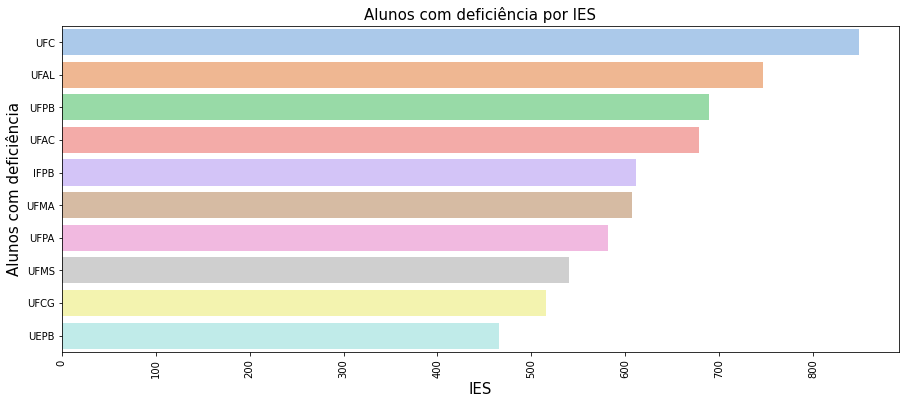

In [ ]:
#Visualizando 
plt.figure(figsize=(15,6))
pcd_ies_publica_plot = sns.barplot(x='ALUNOS_COM_DEFICIENCIA', y='SIGLA_IES', data=df_pcd_ies_publica.head(10), palette='pastel')
plt.xticks(rotation=90)
pcd_ies_publica_plot.set_title('Alunos com deficiência por IES', fontsize = 15)
pcd_ies_publica_plot.set_xlabel('IES',fontsize = 15)
pcd_ies_publica_plot.set_ylabel('Alunos com deficiência',fontsize=15)
pcd_ies_publica_plot.figure.savefig("figura_4.png")

#Análise da relação de alunos com deficiência e recursos disponibilizados pelas IES

In [ ]:
#Agrupando os recursos disponibilizados por IES
relacao = df_curso_e_ies.groupby(['SIGLA_IES'])['RECURSOS'].sum()
relacao.head()

SIGLA_IES
-                 138.0
28 de Agosto        0.0
ADJETIVO-CETEP      3.0
AEMS                0.0
AES                 2.0
Name: RECURSOS, dtype: float64

In [ ]:
#Transformando em um dataframe
df_recursos_ies = pd.DataFrame(relacao,columns=['RECURSOS'])
df_recursos_ies['SIGLA_IES'] = df_recursos_ies.index
df_recursos_ies.index = range(len(df_recursos_ies.index))
df_recursos_ies.sort_values(by='RECURSOS', ascending=False, inplace=True)

In [ ]:
#Unindo as informações sobre recursos nas IES
df_recursos = df_recursos_ies.join(df_pcd_ies_publica.set_index('SIGLA_IES'), on='SIGLA_IES')
df_recursos.sort_values(by='ALUNOS_COM_DEFICIENCIA', ascending=False, inplace=True)
df_recursos.head()

,RECURSOS,SIGLA_IES,ALUNOS_COM_DEFICIENCIA
1474,597.0,UFC,849.0
1471,522.0,UFAL,747.0
1495,1489.0,UFPB,689.0
1470,204.0,UFAC,679.0
1239,478.0,IFPB,611.0


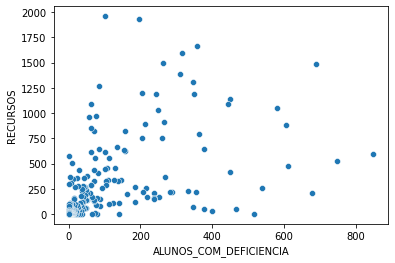

In [ ]:
#Visualizando a relação alunos com deficiência e recursos disponíveis pelas IES públicas
relacao_plot = sns.scatterplot(x='ALUNOS_COM_DEFICIENCIA', y='RECURSOS', data=df_recursos)
relacao_plot.figure.savefig("figura_5.png")

Pelo gráfico acima percebemos que não conseguimos enxergar uma relação entre a quantidade de recursos ofertados com a quantidades de alunos com deficiência nas IES de ensino público.